# Data Mining Final Project

- Group members: 
    - Zhehao Guo (zhg26@pitt.edu)
    - Tong Ka (tok31@pitt.edu)
    - Xiaoqian Xu (xix64@pitt.edu)
- Data set resource: [Link](https://www.kesci.com/home/competition/56cd5f02b89b5bd026cb39c9/content/1)

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
import collections
from functools import reduce
from sklearn import preprocessing
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
import lightgbm as lgb
import collections
from pyecharts import Map, Geo
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from catboost import CatBoostClassifier, CatBoostRegressor, Pool, cv
from sklearn.utils import class_weight
from sklearn.ensemble import RandomForestClassifier

In [3]:
train_loginfo = pd.read_csv("./PPD-First-Round-Data-Update/Training Set/PPD_LogInfo_3_1_Training_Set.csv", encoding='gbk')
train_master = pd.read_csv("./PPD-First-Round-Data-Update/Training Set/PPD_Training_Master_GBK_3_1_Training_Set.csv", encoding='gbk')
train_userinfo = pd.read_csv("./PPD-First-Round-Data-Update/Training Set/PPD_Userupdate_Info_3_1_Training_Set.csv", encoding='gbk')

In [3]:
test_loginfo = pd.read_csv("./PPD-First-Round-Data-Update/Test Set/PPD_LogInfo_2_Test_Set.csv", encoding='gbk')
test_master = pd.read_csv("./PPD-First-Round-Data-Update/Test Set/PPD_Master_GBK_2_Test_Set.csv", encoding='gb18030')
test_userinfo = pd.read_csv("./PPD-First-Round-Data-Update/Test Set/PPD_Userupdate_Info_2_Test_Set.csv", encoding='gbk')

# Data Exploration

## Master dataset

In [4]:
for i in train_master.columns:
    print(i, train_master[i].unique())

Idx [10001 10002 10003 ...  9995  9997  9998]
UserInfo_1 [ 1.  4.  5.  3.  6.  7.  2. nan  0.]
UserInfo_2 ['深圳' '温州' '宜昌' '南平' '辽阳' '吴忠' '绵阳' '东莞' '赤峰' '武汉' '长沙' '漳州' '牡丹江' '太原'
 '北京' '成都' '三明' '临沂' '福州' '泰州' '上海' '红河哈尼族彝族自治州' '郴州' '常州' '湖州' '茂名' '天津'
 '南宁' '聊城' '柳州' '广州' '庆阳' '重庆' '曲靖' '合肥' '上饶' '鸡西' '资阳' '兰州' '济宁' '丽水'
 '滨州' '渭南' '汕头' '黔南' '廊坊' '西宁' '金华' '龙岩' '清远' '徐州' '潍坊' '芜湖' nan '阳泉' '包头'
 '陇南' '保定' '吉安' '厦门' '白银' '大庆' '荆门' '威海' '石家庄' '汕尾' '淄博' '巴彦淖尔盟' '黔西南'
 '昆明' '唐山' '宝鸡' '酒泉' '延边朝鲜族自治州' '泉州' '十堰' '无锡' '黄冈' '商丘' '抚州' '吕梁' '鞍山'
 '阿拉善盟' '黑河' '宿州' '克拉玛依' '淮南' '邵阳' '惠州' '益阳' '淮安' '临汾' '咸宁' '北海' '洛阳' '襄阳'
 '平顶山' '泰安' '扬州' '新乡' '海口' '西安' '焦作' '梅州' '绍兴' '肇庆' '阜阳' '岳阳' '大连' '永州'
 '杭州' '哈尔滨' '郑州' '南阳' '赣州' '济南' '绥化' '恩施' '蚌埠' '河源' '银川' '南京' '榆林' '连云港'
 '韶关' '九江' '镇江' '广元' '菏泽' '阳江' '日照' '台州' '营口' '鄂尔多斯' '沈阳' '常德' '烟台' '中山'
 '白山' '苏州' '周口' '宁德' '大同' '贵阳' '固原' '宿迁' '德阳' '来宾' '宜宾' '随州' '运城' '衢州'
 '嘉兴' '黔东南' '襄樊' '荆州' '邯郸' '邢台' '丹东' '玉林' '南充' '莆田' '安庆' '乌鲁木齐' '伊犁哈萨克自治州'
 '玉溪' '晋中' '乌海' '佛山'

ThirdParty_Info_Period6_1 [  0  -1  11  93  13 222  50  10 236 128  26  41  47  27  59  56  18  29
  62   5  35  16 225  17   2  69 138   1  77  28  44   9  20  21 104  98
  14   7  33   3   8  71  52  99  22  81   6 132 196  30  53  23  88 111
 181  12   4  25 282  31 219 107  37 201  19  72 180 118  36 116  39  34
  84 110 102  57 117  55  40 148  48  85  51  32 183  70 131  65 205  24
  54 193 101  63  46  75  68 231  80  38 113 106  15  78  43  45 122 121
 198  58 182  42 158 174  66  76  73 112  49 114 167 139  95 171 277  94
  60 105 129 120 229 100  91 134 142 115  86  82 155 159 135 130 313 197
 143  67 317 280 151  61  74 189 179  96 126 133 108 230 192 153 124 119
 276 166 178 267 187 269 254 173  90 146  83  92 137 190  87 144 163 175
 199 211 202 141 125  64 149 243 127 169 170 123 150  97 224 245 261 250
  89 164 165 147 140 292 251 103 145 216 273 162 177  79 256 152 109 154
 168 203 220 302 191 136 210 507 403 293 249 232 253 161 156 241 260 226
 315 290 185 207 357 195 

### Delete suffix of city name

In [5]:
def delete_suffix_city(x):
    if str(x) == 'nan' or x == '不详':
        return 'None'
    if len(x.split("、")) == 1 and len(x.split(" ")) == 1:
        if x[-2:] == "地区":
            x = x[:-2]
        if x[-1] == "市":
            x = x[:-1]
    else:
        x = ">1"
    return x
train_master['UserInfo_2'] = train_master['UserInfo_2'].apply(delete_suffix_city)
train_master['UserInfo_4'] = train_master['UserInfo_4'].apply(delete_suffix_city)
train_master['UserInfo_8'] = train_master['UserInfo_8'].apply(delete_suffix_city)
train_master['UserInfo_20'] = train_master['UserInfo_20'].apply(delete_suffix_city)

### Deal with columns which have similar meanings

In [6]:
train_master[['UserInfo_2','UserInfo_4', 'UserInfo_8', 'UserInfo_20', 'UserInfo_24']].head()

,UserInfo_2,UserInfo_4,UserInfo_8,UserInfo_20,UserInfo_24
0,深圳,深圳,深圳,南充,D
1,温州,温州,温州,None,D
2,宜昌,宜昌,宜昌,宜昌,D
3,南平,南平,南平,None,D
4,辽阳,辽阳,辽阳,锦州,D


**Map cities to responding provinces**

In [7]:
China_map={
'香港':['香港'],'澳门':['澳门'],'北京市':['北京市'],'天津市':['天津市'],'上海市':['上海市'],'重庆市':['重庆市'],
'河北省':['石家庄市','唐山市','秦皇岛市','邯郸市','邢台市','保定市','张家口市','承德市','沧州市','廊坊市','衡水市'],
'山西省':['太原市','大同市','阳泉市','长治市','晋城市','朔州市','晋中市','运城市','忻州市','临汾市','吕梁市'],
'内蒙古自治区':['呼和浩特市','包头市','乌海市','赤峰市','通辽市','鄂尔多斯市','呼伦贝尔市','巴彦淖尔市','乌兰察布市','兴安盟','锡林郭勒盟','阿拉善盟','巴彦淖尔盟','乌兰察布盟','古包头市',
         '集宁市'],
'辽宁省':['沈阳市','大连市','鞍山市','抚顺市','本溪市','丹东市','锦州市','营口市','阜新市','辽阳市','盘锦市','铁岭市','朝阳市','葫芦岛市'],
'吉林省':['长春市','吉林市','四平市','辽源市','通化市','白山市','松原市','白城市','延边朝鲜族自治州'],
'黑龙江省':['哈尔滨市','齐齐哈尔市','鸡西市','鹤岗市','双鸭山市','大庆市','伊春市','佳木斯市','七台河市','牡丹江市','黑河市','绥化市','大兴安岭地区','大兴安岭市','延吉市'],
'江苏省':['南京市','无锡市','徐州市','常州市','苏州市','南通市','连云港市','淮安市','盐城市','扬州市','镇江市','泰州市','宿迁市'],
'浙江省':['杭州市','宁波市','温州市','嘉兴市','湖州市','绍兴市','金华市','衢州市','舟山市','台州市','丽水市'],
'安徽省':['合肥市','芜湖市','蚌埠市','淮南市','马鞍山市','淮北市','铜陵市','安庆市','黄山市','滁州市','阜阳市','宿州市','六安市','亳州市','池州市','宣城市','巢湖市'],
'福建省':['福州市','厦门市','莆田市','三明市','泉州市','漳州市','南平市','龙岩市','宁德市'],
'江西省':['南昌市','景德镇市','萍乡市','九江市','新余市','鹰潭市','赣州市','吉安市','宜春市','抚州市','上饶市'],
'山东省':['济南市','青岛市','淄博市','枣庄市','东营市','烟台市','潍坊市','济宁市','泰安市','威海市','日照市','莱芜市','临沂市','德州市','聊城市','滨州市','菏泽市'],
'河南省':['郑州市','开封市','洛阳市','平顶山市','安阳市','鹤壁市','新乡市','焦作市','濮阳市','许昌市','漯河市','三门峡市','南阳市','商丘市','信阳市','周口市','驻马店市','济源市'],
'湖北省':['武汉市','黄石市','十堰市','宜昌市','襄阳市','鄂州市','荆门市','孝感市','荆州市','黄冈市','咸宁市','随州市','恩施土家族苗族自治州','恩施市','襄樊市','江汉市'],
'湖南省':['长沙市','株洲市','湘潭市','衡阳市','邵阳市','岳阳市','常德市','张家界市','益阳市','郴州市','永州市','怀化市','娄底市','湘西土家族苗族自治州'],
'广东省':['广州市','韶关市','深圳市','珠海市','汕头市','佛山市','江门市','湛江市','茂名市','肇庆市','惠州市','梅州市',
'汕尾市','河源市','阳江市','清远市','东莞市','中山市','潮州市','揭阳市','云浮市'],
'广西壮族自治区':['南宁市','柳州市','桂林市','梧州市','北海市','防城港市','钦州市','贵港市','玉林市','百色市','贺州市','河池市','来宾市','崇左市'],
'四川省':['成都市','自贡市','攀枝花市','泸州市','德阳市','绵阳市','广元市','遂宁市','内江市','乐山市','南充市','眉山市',
'宜宾市','广安市','达州市','雅安市','巴中市','资阳市','阿坝藏族羌族自治州','甘孜藏族自治州','凉山彝族自治州','黔江市','万州市'],
'贵州省':['贵阳市','六盘水市','遵义市','安顺市','毕节市','铜仁市','黔西南布依族苗族自治州','黔东南苗族侗族自治州','黔南布依族苗族自治州','黔南市','黔西南市','黔东南市','都匀市','兴义市',
      '凯里市'],
'云南省':['昆明市','曲靖市','玉溪市','保山市','昭通市','丽江市','普洱市','临沧市','楚雄彝族自治州','红河哈尼族彝族自治州',
'文山壮族苗族自治州','西双版纳傣族自治州','大理白族自治州','德宏傣族景颇族自治州','怒江傈僳族自治州','迪庆藏族自治州','凉山市','红河市','德宏市','楚雄市','文山市'],
'陕西省':['西安市','铜川市','宝鸡市','咸阳市','渭南市','延安市','汉中市','榆林市','安康市','商洛市'],
'甘肃省':['兰州市','嘉峪关市','金昌市','白银市','天水市','武威市','张掖市','平凉市','酒泉市','庆阳市','定西市','陇南市','临夏回族自治州','甘南藏族自治州'],
'青海省':['西宁市','海东市','海北藏族自治州','黄南藏族自治州','海南藏族自治州','果洛藏族自治州','玉树藏族自治州','海西蒙古族藏族自治州'],
'宁夏回族自治区':['银川市','石嘴山市','吴忠市','固原市','中卫市'],'海南省':['海口市','三亚市','三沙市','儋州市'],
'西藏自治区':['拉萨市','日喀则市','昌都市','林芝市','山南市','那曲市','阿里地区','迪庆市'],
'新疆维吾尔自治区':['乌鲁木齐市','克拉玛依市','吐鲁番市','哈密市','昌吉回族自治州','博尔塔拉蒙古自治州','巴音郭楞蒙古自治州',
'阿克苏地区','克孜勒苏柯尔克孜自治州','喀什地区','和田地区','伊犁哈萨克自治州','塔城地区','阿勒泰地区','阿克苏市','喀什市','石河子市','和田市','伊犁市','塔城地区市','喀什地区市']
}

In [8]:
def findProvince(x):
    if x[-1] == "省":
        return x
    if x[-2:] != '地区' and not (len(x) > 3 and x[-3:] == "自治州") and not x[-1] == '市' and x != "None" and not (len(x) > 2 and x[-1] == "盟"):
        x += "市"
    for i, j in China_map.items():
        if x in j:
            return i
    return x

In [9]:
train_master['UserInfo_2'] = train_master['UserInfo_2'].fillna("None")
train_master['UserInfo_2_to_province'] = train_master['UserInfo_2'].apply(findProvince)
train_master['UserInfo_4'] = train_master['UserInfo_4'].fillna("None")
train_master['UserInfo_4_to_province'] = train_master['UserInfo_4'].apply(findProvince)

### Default rate of each province

In [10]:
tmp_df = train_master[(train_master['UserInfo_2_to_province']==train_master['UserInfo_4_to_province'])&(train_master['UserInfo_4_to_province']==train_master['UserInfo_19'])&(train_master['UserInfo_2_to_province']==train_master['UserInfo_19'])]
province_default_df = tmp_df[['UserInfo_4_to_province','target']].groupby("UserInfo_4_to_province").sum()/tmp_df[['UserInfo_4_to_province','target']].groupby("UserInfo_4_to_province").count()
province_default_df.head()

,target
UserInfo_4_to_province,
上海市,0.079268
云南省,0.042593
内蒙古自治区,0.043478
北京市,0.057692
吉林省,0.094156


In [11]:
provinces = ['上海','云南','内蒙古','北京','吉林','四川','天津','宁夏','安徽','山东','山西','广东','广西','新疆','江苏'
    ,'江西','河北','河南','浙江','海南','湖北','湖南','甘肃','福建','西藏','贵州','辽宁','重庆','陕西','青海','黑龙江']

In [12]:
province_default_dict = collections.defaultdict(list)
j = 0
for i in province_default_df.index:
    if i[:2] in provinces:
        province_default_dict[i[:2]] = province_default_df.iloc[j].values[0]
    if i[:3] in provinces:
        province_default_dict[i[:3]] = province_default_df.iloc[j].values[0]
    j+=1
province_default_dict

defaultdict(list,
            {'上海': 0.07926829268292683,
             '云南': 0.04259259259259259,
             '内蒙古': 0.043478260869565216,
             '北京': 0.057692307692307696,
             '吉林': 0.09415584415584416,
             '四川': 0.09692898272552783,
             '天津': 0.14423076923076922,
             '宁夏': 0.04132231404958678,
             '安徽': 0.07845433255269321,
             '山东': 0.11681772406847936,
             '山西': 0.06299212598425197,
             '广东': 0.06845637583892618,
             '广西': 0.04380475594493116,
             '新疆': 0.032679738562091505,
             '江苏': 0.08355978260869565,
             '江西': 0.08608058608058608,
             '河北': 0.09060022650056625,
             '河南': 0.06713505074160812,
             '浙江': 0.04883227176220807,
             '海南': 0.088,
             '湖北': 0.08513189448441247,
             '湖南': 0.09881422924901186,
             '甘肃': 0.05830903790087463,
             '福建': 0.05728214503351615,
             '西藏': 0.0,
        

In [13]:
province_distribution = province_default_dict
province=list(province_distribution.keys())
values=list(province_distribution.values())

map = Map("Default rate of each province",'Map of China', width=1200, height=600)
map.add("", province, values, visual_range=[0, max(province_default_dict.values())],  maptype='china', is_visualmap=True,
    visual_text_color='#000')
# map.show_config()
map.render(path="DefaultRateOfEachProvince.html")
map

### External data
- GDP("https://zh.wikipedia.org/wiki/%E4%B8%AD%E5%8D%8E%E4%BA%BA%E6%B0%91%E5%85%B1%E5%92%8C%E5%9B%BD%E7%9C%81%E7%BA%A7%E8%A1%8C%E6%94%BF%E5%8C%BA%E5%9C%B0%E5%8C%BA%E7%94%9F%E4%BA%A7%E6%80%BB%E5%80%BC%E5%88%97%E8%A1%A8")

In [14]:
gdp_df = pd.read_csv("GDP.csv")[['Provinces', 'GDP']]
gdp_df.head()

,Provinces,GDP
0,广东,1103.89
1,江苏,1059.59
2,山东,967.42
3,浙江,653.99
4,河南,568.77


In [15]:
province_gdp_dict = collections.defaultdict(list)
j = 0
for i in gdp_df.index:
    province_gdp_dict[gdp_df.iloc[i]["Provinces"]] = gdp_df.iloc[i]["GDP"]
    j+=1
province_gdp_dict

defaultdict(list,
            {'上海': 383.66,
             '云南': 208.61,
             '内蒙古': 289.29,
             '北京': 347.25,
             '吉林': 224.7,
             '四川': 464.56,
             '天津': 256.02,
             '宁夏': 44.8,
             '安徽': 339.4,
             '山东': 967.42,
             '山西': 207.75,
             '广东': 1103.89,
             '广西': 255.14,
             '新疆': 150.97,
             '江苏': 1059.59,
             '江西': 255.82,
             '河北': 478.95,
             '河南': 568.77,
             '浙江': 653.99,
             '海南': 56.99,
             '湖北': 445.71,
             '湖南': 440.15,
             '甘肃': 111.3,
             '福建': 391.61,
             '西藏': 14.99,
             '贵州': 150.85,
             '辽宁': 466.02,
             '重庆': 380.1,
             '陕西': 287.98,
             '青海': 37.5,
             '黑龙江': 244.83})

In [16]:
province_gdp_distribution = province_gdp_dict
province = list(province_gdp_distribution.keys())
values = list(province_gdp_distribution.values())

map = Map("GDP per capita of each province",'Map of China', width=1200, height=600)
map.add("", province, values, visual_range=[min(province_gdp_dict.values()), max(province_gdp_dict.values())],  maptype='china', is_visualmap=True,
    visual_text_color='#000')
# map.show_config()
map.render(path="GdpPerCapitaOfEachProvince.html")
map

### Deal with same meaning observations

In [17]:
train_master['UserInfo_22'].unique()

array(['D', '未婚', '已婚', '不详', '离婚', '再婚', '初婚'], dtype=object)

** Merge 'D' and '不详' ('Unknown')**

In [18]:
def status_marriage(x):
    if x == 'D' or x == '不详':
        return 'None'
    return x
train_master['UserInfo_22'] = train_master['UserInfo_22'].apply(status_marriage)
train_master['UserInfo_22'].unique()

array(['None', '未婚', '已婚', '离婚', '再婚', '初婚'], dtype=object)

In [19]:
# for feature in train_master.columns:
#     if train_master[feature].dtype != 'int64' and train_master[feature].dtype != 'float64':
#         print(feature, train_master[feature].dtype, train_master[feature].unique())

**Strip blank**

In [20]:
train_master['UserInfo_9'].unique()

array(['中国移动 ', '中国电信 ', '不详', '中国联通 ', '中国联通', '中国电信', '中国移动'],
      dtype=object)

In [21]:
train_master['UserInfo_9'] = train_master['UserInfo_9'].str.strip()
train_master['UserInfo_9'].unique()

array(['中国移动', '中国电信', '不详', '中国联通'], dtype=object)

## loginfo dataset

In [22]:
train_loginfo.head()

,Idx,Listinginfo1,LogInfo1,LogInfo2,LogInfo3
0,10001,2014-03-05,107,6,2014-02-20
1,10001,2014-03-05,107,6,2014-02-23
2,10001,2014-03-05,107,6,2014-02-24
3,10001,2014-03-05,107,6,2014-02-25
4,10001,2014-03-05,107,6,2014-02-27


In [23]:
train_loginfo['Listinginfo1'] = train_loginfo['Listinginfo1'].astype('datetime64')
train_loginfo['LogInfo3'] = train_loginfo['LogInfo3'].astype('datetime64')

### number_of_train_loginfo

In [24]:
number_of_train_loginfo_df = train_loginfo['Idx'].value_counts().to_frame(name="number_of_train_loginfo")
number_of_train_loginfo_df.index.name = 'Idx'
number_of_train_loginfo_df.head()

,number_of_train_loginfo
Idx,
44451,1957
12671,1262
59723,1208
77434,1168
3074,969


### LogInfo3

#### For each Idx, latest loginfo3 date

In [25]:
train_loginfo3_max_df = train_loginfo.groupby('Idx')['LogInfo3'].max().to_frame(name="train_loginfo3_max")
train_loginfo3_max_df.head()

,train_loginfo3_max
Idx,
3,2013-11-01
5,2013-11-06
8,2013-11-06
12,2013-11-01
16,2013-11-04


#### For each Idx, earlest loginfo3 date

In [26]:
train_loginfo3_min_df = train_loginfo.groupby('Idx')['LogInfo3'].min().to_frame(name="train_loginfo3_min")
train_loginfo3_min_df.head()

,train_loginfo3_min
Idx,
3,2013-08-30
5,2013-10-24
8,2013-10-25
12,2012-12-08
16,2013-10-27


#### For each Idx, date difference between earliest loginfo3 date and latest loginfo3 date

In [27]:
diff = (train_loginfo.groupby('Idx')['LogInfo3'].max()-train_loginfo.groupby('Idx')['LogInfo3'].min()).map(lambda x: x.days)
train_loginfo3_max_min_diff_df = diff.to_frame(name="train_loginfo3_max_min_diff")
train_loginfo3_max_min_diff_df.head()

,train_loginfo3_max_min_diff
Idx,
3,63
5,13
8,12
12,328
16,8


#### For each Idx, loginfo3 frequency

In [28]:
# frequency decimal is 2; set inf to 1
freq_df = number_of_train_loginfo_df.merge(train_loginfo3_max_min_diff_df, left_index=True, right_index=True, how='inner')
freq_df['freq_loginfo3'] = freq_df['number_of_train_loginfo']/freq_df['train_loginfo3_max_min_diff']
freq_df.drop(columns=['number_of_train_loginfo', 'train_loginfo3_max_min_diff'], inplace = True)
freq_df = freq_df.round(2)
freq_df = freq_df['freq_loginfo3'].map(lambda x: 1 if x == float('inf') else x).to_frame(name="freq_loginfo3")
freq_df.index.name = 'Idx'
freq_df.head()

,freq_loginfo3
Idx,
44451,177.91
12671,7.60
59723,0.91
77434,1.16
3074,1.28


#### For each Idx, number of loginfo1

In [29]:
num_LogInfo1_df = train_loginfo.groupby('Idx')['LogInfo1'].nunique().to_frame(name = '#LogInfo1')
num_LogInfo1_df.head()

,#LogInfo1
Idx,
3,4
5,6
8,7
12,8
16,4


#### For each Idx, number of loginfo2

In [30]:
num_LogInfo2_df = train_loginfo.groupby('Idx')['LogInfo2'].nunique().to_frame(name = '#LogInfo2')
num_LogInfo2_df.head()

,#LogInfo2
Idx,
3,6
5,5
8,7
12,9
16,4


#### All new dfs in train_loginfo

In [31]:
dfs = [number_of_train_loginfo_df, train_loginfo3_max_min_diff_df, freq_df,num_LogInfo1_df,num_LogInfo2_df]
train_loginfo_final = reduce(lambda left,right: pd.merge(left,right,on='Idx'), dfs)
train_loginfo_final.head()

,number_of_train_loginfo,train_loginfo3_max_min_diff,freq_loginfo3,#LogInfo1,#LogInfo2
Idx,,,,,
44451,1957,11,177.91,6,6
12671,1262,166,7.60,6,11
59723,1208,1324,0.91,5,6
77434,1168,1010,1.16,7,11
3074,969,759,1.28,7,9


## Userupdate_Info dataset

In [32]:
train_userinfo.head()

,Idx,ListingInfo1,UserupdateInfo1,UserupdateInfo2
0,10001,2014/03/05,_EducationId,2014/02/20
1,10001,2014/03/05,_HasBuyCar,2014/02/20
2,10001,2014/03/05,_LastUpdateDate,2014/02/20
3,10001,2014/03/05,_MarriageStatusId,2014/02/20
4,10001,2014/03/05,_MobilePhone,2014/02/20


### Lowercase letters

In [33]:
train_userinfo["UserupdateInfo1"].nunique()

86

In [34]:
train_userinfo["UserupdateInfo1"] = train_userinfo["UserupdateInfo1"].map(lambda x: x.lower())
train_userinfo["UserupdateInfo1"].nunique()

55

### Make datatime columns transfered to datetime

In [35]:
train_userinfo['ListingInfo1'] = train_userinfo['ListingInfo1'].astype('datetime64')
train_userinfo['UserupdateInfo2'] = train_userinfo['UserupdateInfo2'].astype('datetime64')

### number_of_train_loginfo

In [36]:
number_of_train_userinfo_df = train_userinfo['Idx'].value_counts().to_frame(name="number_of_train_userinfo")
number_of_train_userinfo_df.index.name = 'Idx'
number_of_train_userinfo_df.head()

,number_of_train_userinfo
Idx,
1533,89
27419,88
14414,86
44784,85
40931,80


### For each Idx, latest and earlest UserupdateInfo2 date

In [37]:
train_UserupdateInfo2_max_df = train_userinfo.groupby('Idx')['UserupdateInfo2'].max().to_frame(name="train_UserupdateInfo2_max")
train_UserupdateInfo2_max_df.head()

,train_UserupdateInfo2_max
Idx,
3,2013-08-30
5,2013-10-24
8,2013-11-04
12,2013-10-02
16,2013-11-05


In [38]:
train_UserupdateInfo2_min_df = train_userinfo.groupby('Idx')['UserupdateInfo2'].min().to_frame(name="train_UserupdateInfo2_min")
train_UserupdateInfo2_min_df.head()

,train_UserupdateInfo2_min
Idx,
3,2013-08-30
5,2013-10-24
8,2013-10-25
12,2012-12-08
16,2013-10-27


### For each Idx, date difference between earlest loginfo3 date and latest loginfo3 date

In [39]:
diff = (train_userinfo.groupby('Idx')['UserupdateInfo2'].max()-train_userinfo.groupby('Idx')['UserupdateInfo2'].min()).map(lambda x: x.days)
train_userinfo_max_min_diff_df = diff.to_frame(name="train_userinfo_max_min_diff")
train_userinfo_max_min_diff_df.head()

,train_userinfo_max_min_diff
Idx,
3,0
5,0
8,10
12,298
16,9


### Frequency

In [40]:
# frequency decimal is 2; set inf to 1
freq_user_df = number_of_train_userinfo_df.merge(train_userinfo_max_min_diff_df, left_index=True, right_index=True, how='inner')
freq_user_df['freq_userinfo'] = freq_user_df['number_of_train_userinfo']/freq_user_df['train_userinfo_max_min_diff']
freq_user_df.drop(columns=['number_of_train_userinfo', 'train_userinfo_max_min_diff'], inplace = True)
freq_user_df = freq_user_df.round(2)
freq_user_df = freq_user_df['freq_userinfo'].map(lambda x: 1 if x == float('inf') else x).to_frame(name="freq_userinfo")
freq_user_df.index.name = 'Idx'
freq_user_df.head()

,freq_userinfo
Idx,
1533,12.71
27419,0.24
14414,0.55
44784,0.45
40931,1.95


### For each idx, number of UserupdateInfo1

In [41]:
num_UserupdateInfo1_df = train_userinfo.groupby('Idx')['UserupdateInfo1'].nunique().to_frame(name = '#UserupdateInfo1')
num_UserupdateInfo1_df.head()

,#UserupdateInfo1
Idx,
3,11
5,11
8,11
12,13
16,11


### All new dfs in train_userinfo

In [42]:
dfs = [number_of_train_userinfo_df, train_userinfo_max_min_diff_df, freq_user_df, num_UserupdateInfo1_df]
train_userinfo_final = reduce(lambda left,right: pd.merge(left,right,on='Idx'), dfs)
train_userinfo_final.head()

,number_of_train_userinfo,train_userinfo_max_min_diff,freq_userinfo,#UserupdateInfo1
Idx,,,,
1533,89,7,12.71,12
27419,88,365,0.24,21
14414,86,156,0.55,12
44784,85,190,0.45,12
40931,80,41,1.95,24


## Data process

In [43]:
dfs = [train_master, train_userinfo_final, train_loginfo_final]
train_df = reduce(lambda left,right: pd.merge(left,right,on='Idx',how='outer'), dfs)
train_df.head()

,Idx,UserInfo_1,UserInfo_2,UserInfo_3,UserInfo_4,WeblogInfo_1,WeblogInfo_2,WeblogInfo_3,WeblogInfo_4,WeblogInfo_5,...,UserInfo_4_to_province,number_of_train_userinfo,train_userinfo_max_min_diff,freq_userinfo,#UserupdateInfo1,number_of_train_loginfo,train_loginfo3_max_min_diff,freq_loginfo3,#LogInfo1,#LogInfo2
0,10001,1.0,深圳,4.0,深圳,NaN,1.0,NaN,1.0,1.0,...,广东省,11.0,0.0,1.00,10.0,19.0,12.0,1.58,6.0,5.0
1,10002,1.0,温州,4.0,温州,NaN,0.0,NaN,1.0,1.0,...,浙江省,21.0,244.0,0.09,15.0,24.0,249.0,0.10,6.0,6.0
2,10003,1.0,宜昌,3.0,宜昌,NaN,0.0,NaN,2.0,2.0,...,湖北省,10.0,0.0,1.00,9.0,14.0,7.0,2.00,5.0,5.0
3,10006,4.0,南平,1.0,南平,NaN,NaN,NaN,NaN,NaN,...,福建省,10.0,0.0,1.00,9.0,7.0,0.0,1.00,4.0,5.0
4,10007,5.0,辽阳,1.0,辽阳,NaN,0.0,NaN,1.0,1.0,...,辽宁省,10.0,1.0,10.00,10.0,5.0,7.0,0.71,3.0,3.0


In [44]:
target = train_df['target']
train_df.drop('target',inplace = True, axis = 1)
train_df.drop('Idx', inplace = True, axis = 1)

In [45]:
mask = (train_df.count() / train_df.shape[0]) > 0.03
filter_data = train_df.loc[:,mask].copy()

### Fill null, encoding and scale

In [46]:
numerical_features_mask = filter_data.columns[(filter_data.dtypes == "float64") | (filter_data.dtypes == "int64")].tolist()
label_features_mask = filter_data.columns[(filter_data.dtypes == "object") & (filter_data.nunique() > 200)].tolist()
dummy_features_mask = filter_data.columns[(filter_data.dtypes == "object") & (filter_data.nunique() <= 200)].tolist()

filter_data[numerical_features_mask] = filter_data[numerical_features_mask].fillna(0)
filter_data[label_features_mask] = filter_data[label_features_mask].fillna("None")
filter_data[dummy_features_mask] = filter_data[dummy_features_mask].fillna("None")

for i in label_features_mask:
    filter_data[i] = preprocessing.LabelEncoder().fit_transform(filter_data[i])

for i in numerical_features_mask:
    filter_data[i] = StandardScaler().fit_transform(filter_data[i].values.reshape(-1, 1))
    
dummy_features = pd.get_dummies(filter_data[dummy_features_mask]).values
for i in dummy_features_mask:
    filter_data[i] = preprocessing.LabelEncoder().fit_transform(filter_data[i])

### Matrix decomposition
**Decompose dummy features**

In [47]:
dummy_features.shape, dummy_features.shape[0]*dummy_features.shape[1], dummy_features.sum()

((30000, 245), 7350000, 480000)

In [48]:
svd = TruncatedSVD(n_components= 50)
pca = PCA(n_components= 50)
nmf = NMF(n_components = 50)

scale = StandardScaler()

svd_features = svd.fit_transform(scale.fit_transform(dummy_features))
pca_features = pca.fit_transform(dummy_features)
nmf_features = nmf.fit_transform(dummy_features)
merge_decomp_features = np.hstack([svd_features, pca_features, nmf_features])

In [49]:
merge_decomp_features_df = pd.DataFrame(data = merge_decomp_features.tolist(),columns=["merge_decomp"+str(c) for c in range(merge_decomp_features.shape[1])])

In [50]:
train_data = filter_data.merge(merge_decomp_features_df,left_index = True, right_index = True)

## Models

### Ligtgbm

In [51]:
x_train, x_test, y_train, y_test = train_test_split(train_data, 
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state=1)

In [52]:
params = {
    'boosting_type': 'gbdt',
    'metric': 'auc',
    'application':"binary",
    'objective': 'binary',
    'num_iterations': 2500,
    'learning_rate': 0.005,
    'max_depth': 2, 
    'num_leaves': 4,
    'feature_fraction':0.8,
    'bagging_fraction':0.8,
#     'bagging_freq':10,
    
    'min_data_in_leaf':30,
    'max_bin': 100,
    
    'lambda_l1': 8,
    'lambda_l2': 5,
    'scale_pos_weight': (target.count()-target.sum())/target.sum(),
#     'nthread': 6,
#     'subsample': 0.5,
    
}

lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_val, y_val, reference=lgb_train)

gbm = lgb.train(params, lgb_train, num_boost_round=500, valid_sets=lgb_eval, early_stopping_rounds=50)

[1]	valid_0's auc: 0.614002
Training until validation scores don't improve for 50 rounds
[2]	valid_0's auc: 0.617278
[3]	valid_0's auc: 0.617278
[4]	valid_0's auc: 0.620699
[5]	valid_0's auc: 0.628403
[6]	valid_0's auc: 0.636098
[7]	valid_0's auc: 0.645756
[8]	valid_0's auc: 0.651744
[9]	valid_0's auc: 0.654056
[10]	valid_0's auc: 0.653474
[11]	valid_0's auc: 0.654467
[12]	valid_0's auc: 0.655956
[13]	valid_0's auc: 0.655101
[14]	valid_0's auc: 0.656787
[15]	valid_0's auc: 0.657107
[16]	valid_0's auc: 0.657351
[17]	valid_0's auc: 0.659005
[18]	valid_0's auc: 0.659729
[19]	valid_0's auc: 0.659378
[20]	valid_0's auc: 0.659574
[21]	valid_0's auc: 0.660865
[22]	valid_0's auc: 0.661661
[23]	valid_0's auc: 0.662404
[24]	valid_0's auc: 0.661975
[25]	valid_0's auc: 0.661402
[26]	valid_0's auc: 0.661208
[27]	valid_0's auc: 0.661523
[28]	valid_0's auc: 0.662916
[29]	valid_0's auc: 0.664647
[30]	valid_0's auc: 0.665082
[31]	valid_0's auc: 0.664902
[32]	valid_0's auc: 0.66552
[33]	valid_0's auc: 0

[282]	valid_0's auc: 0.691636
[283]	valid_0's auc: 0.691897
[284]	valid_0's auc: 0.691866
[285]	valid_0's auc: 0.692195
[286]	valid_0's auc: 0.692242
[287]	valid_0's auc: 0.692159
[288]	valid_0's auc: 0.692241
[289]	valid_0's auc: 0.692222
[290]	valid_0's auc: 0.692345
[291]	valid_0's auc: 0.692543
[292]	valid_0's auc: 0.692768
[293]	valid_0's auc: 0.692723
[294]	valid_0's auc: 0.692779
[295]	valid_0's auc: 0.692909
[296]	valid_0's auc: 0.693118
[297]	valid_0's auc: 0.69311
[298]	valid_0's auc: 0.693258
[299]	valid_0's auc: 0.693363
[300]	valid_0's auc: 0.693419
[301]	valid_0's auc: 0.693562
[302]	valid_0's auc: 0.693552
[303]	valid_0's auc: 0.693588
[304]	valid_0's auc: 0.69366
[305]	valid_0's auc: 0.69375
[306]	valid_0's auc: 0.693987
[307]	valid_0's auc: 0.693966
[308]	valid_0's auc: 0.694045
[309]	valid_0's auc: 0.694071
[310]	valid_0's auc: 0.69408
[311]	valid_0's auc: 0.694051
[312]	valid_0's auc: 0.69411
[313]	valid_0's auc: 0.694153
[314]	valid_0's auc: 0.694243
[315]	valid_0's

[576]	valid_0's auc: 0.709136
[577]	valid_0's auc: 0.709137
[578]	valid_0's auc: 0.709211
[579]	valid_0's auc: 0.709328
[580]	valid_0's auc: 0.709424
[581]	valid_0's auc: 0.709357
[582]	valid_0's auc: 0.709456
[583]	valid_0's auc: 0.709554
[584]	valid_0's auc: 0.709589
[585]	valid_0's auc: 0.709657
[586]	valid_0's auc: 0.709784
[587]	valid_0's auc: 0.709852
[588]	valid_0's auc: 0.709962
[589]	valid_0's auc: 0.710018
[590]	valid_0's auc: 0.710059
[591]	valid_0's auc: 0.710136
[592]	valid_0's auc: 0.710232
[593]	valid_0's auc: 0.710195
[594]	valid_0's auc: 0.710288
[595]	valid_0's auc: 0.710264
[596]	valid_0's auc: 0.710265
[597]	valid_0's auc: 0.710385
[598]	valid_0's auc: 0.710537
[599]	valid_0's auc: 0.710522
[600]	valid_0's auc: 0.710503
[601]	valid_0's auc: 0.710503
[602]	valid_0's auc: 0.710564
[603]	valid_0's auc: 0.710678
[604]	valid_0's auc: 0.710758
[605]	valid_0's auc: 0.710774
[606]	valid_0's auc: 0.710814
[607]	valid_0's auc: 0.710813
[608]	valid_0's auc: 0.710872
[609]	vali

[851]	valid_0's auc: 0.722514
[852]	valid_0's auc: 0.722615
[853]	valid_0's auc: 0.722608
[854]	valid_0's auc: 0.722702
[855]	valid_0's auc: 0.722693
[856]	valid_0's auc: 0.722653
[857]	valid_0's auc: 0.722731
[858]	valid_0's auc: 0.72274
[859]	valid_0's auc: 0.722743
[860]	valid_0's auc: 0.722789
[861]	valid_0's auc: 0.722879
[862]	valid_0's auc: 0.722922
[863]	valid_0's auc: 0.722977
[864]	valid_0's auc: 0.722998
[865]	valid_0's auc: 0.723081
[866]	valid_0's auc: 0.723147
[867]	valid_0's auc: 0.723193
[868]	valid_0's auc: 0.723152
[869]	valid_0's auc: 0.723214
[870]	valid_0's auc: 0.723236
[871]	valid_0's auc: 0.723199
[872]	valid_0's auc: 0.723192
[873]	valid_0's auc: 0.723248
[874]	valid_0's auc: 0.7233
[875]	valid_0's auc: 0.723402
[876]	valid_0's auc: 0.723454
[877]	valid_0's auc: 0.723408
[878]	valid_0's auc: 0.723405
[879]	valid_0's auc: 0.723451
[880]	valid_0's auc: 0.723484
[881]	valid_0's auc: 0.723547
[882]	valid_0's auc: 0.723587
[883]	valid_0's auc: 0.7236
[884]	valid_0's

[1139]	valid_0's auc: 0.730644
[1140]	valid_0's auc: 0.73068
[1141]	valid_0's auc: 0.730694
[1142]	valid_0's auc: 0.730748
[1143]	valid_0's auc: 0.730774
[1144]	valid_0's auc: 0.730798
[1145]	valid_0's auc: 0.730835
[1146]	valid_0's auc: 0.730801
[1147]	valid_0's auc: 0.73085
[1148]	valid_0's auc: 0.730835
[1149]	valid_0's auc: 0.73086
[1150]	valid_0's auc: 0.730882
[1151]	valid_0's auc: 0.730919
[1152]	valid_0's auc: 0.730911
[1153]	valid_0's auc: 0.730973
[1154]	valid_0's auc: 0.731046
[1155]	valid_0's auc: 0.731048
[1156]	valid_0's auc: 0.731025
[1157]	valid_0's auc: 0.731018
[1158]	valid_0's auc: 0.731038
[1159]	valid_0's auc: 0.731116
[1160]	valid_0's auc: 0.731148
[1161]	valid_0's auc: 0.731155
[1162]	valid_0's auc: 0.73117
[1163]	valid_0's auc: 0.731208
[1164]	valid_0's auc: 0.731231
[1165]	valid_0's auc: 0.731298
[1166]	valid_0's auc: 0.731357
[1167]	valid_0's auc: 0.731365
[1168]	valid_0's auc: 0.731394
[1169]	valid_0's auc: 0.731399
[1170]	valid_0's auc: 0.73145
[1171]	valid_

[1406]	valid_0's auc: 0.735428
[1407]	valid_0's auc: 0.735458
[1408]	valid_0's auc: 0.735465
[1409]	valid_0's auc: 0.735481
[1410]	valid_0's auc: 0.735536
[1411]	valid_0's auc: 0.735538
[1412]	valid_0's auc: 0.735584
[1413]	valid_0's auc: 0.735602
[1414]	valid_0's auc: 0.735558
[1415]	valid_0's auc: 0.735561
[1416]	valid_0's auc: 0.735579
[1417]	valid_0's auc: 0.735595
[1418]	valid_0's auc: 0.735626
[1419]	valid_0's auc: 0.735687
[1420]	valid_0's auc: 0.735738
[1421]	valid_0's auc: 0.735715
[1422]	valid_0's auc: 0.735727
[1423]	valid_0's auc: 0.735718
[1424]	valid_0's auc: 0.735776
[1425]	valid_0's auc: 0.735745
[1426]	valid_0's auc: 0.735759
[1427]	valid_0's auc: 0.735767
[1428]	valid_0's auc: 0.735787
[1429]	valid_0's auc: 0.735815
[1430]	valid_0's auc: 0.7358
[1431]	valid_0's auc: 0.735809
[1432]	valid_0's auc: 0.735805
[1433]	valid_0's auc: 0.735846
[1434]	valid_0's auc: 0.735835
[1435]	valid_0's auc: 0.735869
[1436]	valid_0's auc: 0.735864
[1437]	valid_0's auc: 0.735936
[1438]	val

[1680]	valid_0's auc: 0.738494
[1681]	valid_0's auc: 0.738497
[1682]	valid_0's auc: 0.738508
[1683]	valid_0's auc: 0.738469
[1684]	valid_0's auc: 0.738443
[1685]	valid_0's auc: 0.738477
[1686]	valid_0's auc: 0.738497
[1687]	valid_0's auc: 0.738523
[1688]	valid_0's auc: 0.738528
[1689]	valid_0's auc: 0.738528
[1690]	valid_0's auc: 0.738549
[1691]	valid_0's auc: 0.738526
[1692]	valid_0's auc: 0.738503
[1693]	valid_0's auc: 0.738471
[1694]	valid_0's auc: 0.738446
[1695]	valid_0's auc: 0.73844
[1696]	valid_0's auc: 0.738453
[1697]	valid_0's auc: 0.738476
[1698]	valid_0's auc: 0.738506
[1699]	valid_0's auc: 0.738536
[1700]	valid_0's auc: 0.738558
[1701]	valid_0's auc: 0.73852
[1702]	valid_0's auc: 0.738585
[1703]	valid_0's auc: 0.738609
[1704]	valid_0's auc: 0.738595
[1705]	valid_0's auc: 0.7386
[1706]	valid_0's auc: 0.738595
[1707]	valid_0's auc: 0.738641
[1708]	valid_0's auc: 0.738694
[1709]	valid_0's auc: 0.738649
[1710]	valid_0's auc: 0.738628
[1711]	valid_0's auc: 0.738634
[1712]	valid

[1946]	valid_0's auc: 0.740105
[1947]	valid_0's auc: 0.740134
[1948]	valid_0's auc: 0.740156
[1949]	valid_0's auc: 0.740178
[1950]	valid_0's auc: 0.740128
[1951]	valid_0's auc: 0.740141
[1952]	valid_0's auc: 0.740152
[1953]	valid_0's auc: 0.740191
[1954]	valid_0's auc: 0.740155
[1955]	valid_0's auc: 0.740145
[1956]	valid_0's auc: 0.740122
[1957]	valid_0's auc: 0.740101
[1958]	valid_0's auc: 0.740114
[1959]	valid_0's auc: 0.740141
[1960]	valid_0's auc: 0.740123
[1961]	valid_0's auc: 0.740134
[1962]	valid_0's auc: 0.740121
[1963]	valid_0's auc: 0.740114
[1964]	valid_0's auc: 0.740111
[1965]	valid_0's auc: 0.740075
[1966]	valid_0's auc: 0.740074
[1967]	valid_0's auc: 0.740102
[1968]	valid_0's auc: 0.740116
[1969]	valid_0's auc: 0.740128
[1970]	valid_0's auc: 0.740179
[1971]	valid_0's auc: 0.740234
[1972]	valid_0's auc: 0.740241
[1973]	valid_0's auc: 0.740262
[1974]	valid_0's auc: 0.740237
[1975]	valid_0's auc: 0.740257
[1976]	valid_0's auc: 0.740274
[1977]	valid_0's auc: 0.740279
[1978]	v

[2225]	valid_0's auc: 0.741361
[2226]	valid_0's auc: 0.741381
[2227]	valid_0's auc: 0.741307
[2228]	valid_0's auc: 0.741327
[2229]	valid_0's auc: 0.741336
[2230]	valid_0's auc: 0.741329
[2231]	valid_0's auc: 0.741314
[2232]	valid_0's auc: 0.741318
[2233]	valid_0's auc: 0.741329
[2234]	valid_0's auc: 0.741332
[2235]	valid_0's auc: 0.741314
[2236]	valid_0's auc: 0.741313
[2237]	valid_0's auc: 0.741336
[2238]	valid_0's auc: 0.741337
[2239]	valid_0's auc: 0.741353
[2240]	valid_0's auc: 0.741385
[2241]	valid_0's auc: 0.741386
[2242]	valid_0's auc: 0.741388
[2243]	valid_0's auc: 0.741395
[2244]	valid_0's auc: 0.741399
[2245]	valid_0's auc: 0.741388
[2246]	valid_0's auc: 0.741392
[2247]	valid_0's auc: 0.741414
[2248]	valid_0's auc: 0.741381
[2249]	valid_0's auc: 0.741404
[2250]	valid_0's auc: 0.741408
[2251]	valid_0's auc: 0.741457
[2252]	valid_0's auc: 0.741405
[2253]	valid_0's auc: 0.741395
[2254]	valid_0's auc: 0.741372
[2255]	valid_0's auc: 0.741383
[2256]	valid_0's auc: 0.741393
[2257]	v

[2499]	valid_0's auc: 0.741954
[2500]	valid_0's auc: 0.741995
Did not meet early stopping. Best iteration is:
[2489]	valid_0's auc: 0.742068


In [53]:
y_train_pred = gbm.predict(x_train, num_iteration=gbm.best_iteration)
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred)
metrics.auc(fpr, tpr)

0.8128775876380796

In [54]:
y_test_pred = gbm.predict(x_test, num_iteration=gbm.best_iteration)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred)
metrics.auc(fpr, tpr)

0.7360471799647974

In [55]:
def plot_roc_curve(y_train, x_train_pre, y_test, x_test_pre): 
    plt.plot(roc_curve(y_train, x_train_pre)[0],roc_curve(y_train, x_train_pre)[1], 
             color = 'blue', label='Train ROC Curve (area = %0.3f)' % roc_auc_score(y_train, x_train_pre))

    plt.plot(roc_curve(y_test, x_test_pre)[0],roc_curve(y_test, x_test_pre)[1], 
             color = 'red', label='Test ROC Curve (area = %0.3f)' % roc_auc_score(y_test, x_test_pre))


    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend()
    plt.show()

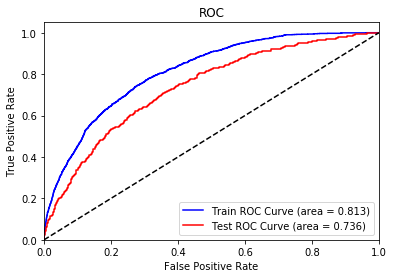

In [56]:
plot_roc_curve(y_train, gbm.predict(x_train, num_iteration=gbm.best_iteration), y_test, gbm.predict(x_test, num_iteration=gbm.best_iteration))

### Adaboost

In [57]:
x_train, x_test, y_train, y_test = train_test_split(train_data, 
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state=1)

In [58]:
adab_model = AdaBoostClassifier(
            n_estimators = 225,
            learning_rate = 0.05,
            random_state = 42,
                        )
adab_model.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.05,
                   n_estimators=225, random_state=42)

In [59]:
x_train_probs_adab = adab_model.predict_proba(x_train)
fpr, tpr, thresholds = metrics.roc_curve(y_train, x_train_probs_adab[:,1])
metrics.auc(fpr, tpr)

0.7478492795874022

In [60]:
x_test_probs_adab = adab_model.predict_proba(x_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, x_test_probs_adab[:,1])
metrics.auc(fpr, tpr)

0.7127616789788963

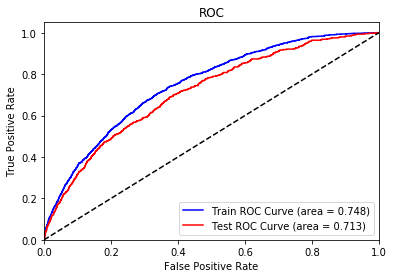

In [61]:
plot_roc_curve(y_train, adab_model.predict_proba(x_train)[:,1], y_test, adab_model.predict_proba(x_test)[:,1])

### Xgboost

In [588]:
x_train, x_test, y_train, y_test = train_test_split(train_data, 
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state=1)

In [592]:
dtrain = xgb.DMatrix(data = x_train, label = y_train)
dval = xgb.DMatrix(data = x_val, label = y_val)
dtest = xgb.DMatrix(data = x_test, label = y_test)

In [645]:
param = {
        'n_estimators': 200,
        'max_depth':2,
        'min_child_weight':0.8,
        'eta': 0.008,
    
        'silent':1,
        'max_leaf_nodes': 4,
#          'objective':'binary:logistic',
        'eval_metric': 'auc', 
        'gamma': 0.1,
#          'lambda': 220,
#          'alpha': 2,
        'subsample': 0.7,
        'colsample_bytree' : 0.7,
         #,colsample_bynode' : ???
        'scale_pos_weight' : sum(target==0) / sum(target==1), # sum(negative instances) / sum(positive instances)
#          'maximize' : 'FALSE',
#          'n_jobs' : -1,
         #,'base_score' : ???
         #,'max_delta_step' : ???
        }

watchlist = [(dtrain, 'train'), (dval, 'eval')]
num_round = 1000 # This is another hyperparameter of sorts, usually thousand
xgbst_model = xgb.train(param, dtrain, num_round, watchlist, early_stopping_rounds = 10)

[0]	train-auc:0.634387	eval-auc:0.610079
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[1]	train-auc:0.65484	eval-auc:0.617585
[2]	train-auc:0.669655	eval-auc:0.62481
[3]	train-auc:0.672796	eval-auc:0.627984
[4]	train-auc:0.680251	eval-auc:0.639274
[5]	train-auc:0.683952	eval-auc:0.646826
[6]	train-auc:0.684497	eval-auc:0.649208
[7]	train-auc:0.681597	eval-auc:0.647875
[8]	train-auc:0.685474	eval-auc:0.65465
[9]	train-auc:0.688025	eval-auc:0.656115
[10]	train-auc:0.687249	eval-auc:0.656568
[11]	train-auc:0.687302	eval-auc:0.658455
[12]	train-auc:0.685786	eval-auc:0.657376
[13]	train-auc:0.687423	eval-auc:0.659603
[14]	train-auc:0.686622	eval-auc:0.659175
[15]	train-auc:0.685926	eval-auc:0.658327
[16]	train-auc:0.685179	eval-auc:0.658021
[17]	train-auc:0.686992	eval-auc:0.661048
[18]	train-auc:0.687718	eval-auc:0.66181
[19]	train-auc:0.688112	eval-auc:0.661523
[20]	train-auc:0.689596	eval-auc:

[191]	train-auc:0.728407	eval-auc:0.691166
[192]	train-auc:0.728711	eval-auc:0.691402
[193]	train-auc:0.72866	eval-auc:0.691354
[194]	train-auc:0.728873	eval-auc:0.691751
[195]	train-auc:0.728984	eval-auc:0.692123
[196]	train-auc:0.729129	eval-auc:0.692171
[197]	train-auc:0.729234	eval-auc:0.692283
[198]	train-auc:0.729379	eval-auc:0.692402
[199]	train-auc:0.729561	eval-auc:0.692704
[200]	train-auc:0.729556	eval-auc:0.69268
[201]	train-auc:0.729515	eval-auc:0.692627
[202]	train-auc:0.729634	eval-auc:0.692762
[203]	train-auc:0.729818	eval-auc:0.692826
[204]	train-auc:0.729728	eval-auc:0.692566
[205]	train-auc:0.729789	eval-auc:0.69259
[206]	train-auc:0.729967	eval-auc:0.692645
[207]	train-auc:0.730174	eval-auc:0.692771
[208]	train-auc:0.730261	eval-auc:0.69302
[209]	train-auc:0.730513	eval-auc:0.693313
[210]	train-auc:0.730517	eval-auc:0.693499
[211]	train-auc:0.730594	eval-auc:0.69352
[212]	train-auc:0.730802	eval-auc:0.693802
[213]	train-auc:0.731104	eval-auc:0.694066
[214]	train-auc:

[383]	train-auc:0.752031	eval-auc:0.713525
[384]	train-auc:0.752152	eval-auc:0.71362
[385]	train-auc:0.752265	eval-auc:0.713806
[386]	train-auc:0.752407	eval-auc:0.713925
[387]	train-auc:0.752552	eval-auc:0.714063
[388]	train-auc:0.752728	eval-auc:0.714336
[389]	train-auc:0.752855	eval-auc:0.714505
[390]	train-auc:0.752998	eval-auc:0.714567
[391]	train-auc:0.752984	eval-auc:0.714513
[392]	train-auc:0.753128	eval-auc:0.714597
[393]	train-auc:0.753239	eval-auc:0.714728
[394]	train-auc:0.753338	eval-auc:0.714832
[395]	train-auc:0.753507	eval-auc:0.714933
[396]	train-auc:0.753664	eval-auc:0.715132
[397]	train-auc:0.753829	eval-auc:0.715338
[398]	train-auc:0.753842	eval-auc:0.71534
[399]	train-auc:0.753907	eval-auc:0.715365
[400]	train-auc:0.753972	eval-auc:0.715374
[401]	train-auc:0.754143	eval-auc:0.715434
[402]	train-auc:0.754201	eval-auc:0.715391
[403]	train-auc:0.754262	eval-auc:0.715384
[404]	train-auc:0.754278	eval-auc:0.715457
[405]	train-auc:0.754352	eval-auc:0.715589
[406]	train-a

[575]	train-auc:0.768761	eval-auc:0.726584
[576]	train-auc:0.768836	eval-auc:0.72664
[577]	train-auc:0.768953	eval-auc:0.726739
[578]	train-auc:0.769028	eval-auc:0.726866
[579]	train-auc:0.769045	eval-auc:0.726839
[580]	train-auc:0.769078	eval-auc:0.726829
[581]	train-auc:0.769176	eval-auc:0.72687
[582]	train-auc:0.769253	eval-auc:0.727053
[583]	train-auc:0.769303	eval-auc:0.727084
[584]	train-auc:0.769405	eval-auc:0.727125
[585]	train-auc:0.769414	eval-auc:0.727247
[586]	train-auc:0.769504	eval-auc:0.727323
[587]	train-auc:0.769574	eval-auc:0.7274
[588]	train-auc:0.769687	eval-auc:0.72741
[589]	train-auc:0.769754	eval-auc:0.727383
[590]	train-auc:0.769816	eval-auc:0.727481
[591]	train-auc:0.769873	eval-auc:0.727668
[592]	train-auc:0.769964	eval-auc:0.727733
[593]	train-auc:0.770078	eval-auc:0.727775
[594]	train-auc:0.770156	eval-auc:0.727774
[595]	train-auc:0.770235	eval-auc:0.727832
[596]	train-auc:0.770321	eval-auc:0.727806
[597]	train-auc:0.770294	eval-auc:0.727827
[598]	train-auc:

[767]	train-auc:0.78222	eval-auc:0.736535
[768]	train-auc:0.7823	eval-auc:0.736591
[769]	train-auc:0.782335	eval-auc:0.736614
[770]	train-auc:0.782421	eval-auc:0.736675
[771]	train-auc:0.782485	eval-auc:0.736758
[772]	train-auc:0.782567	eval-auc:0.736938
[773]	train-auc:0.78263	eval-auc:0.736956
[774]	train-auc:0.782616	eval-auc:0.73703
[775]	train-auc:0.78266	eval-auc:0.737131
[776]	train-auc:0.782716	eval-auc:0.737172
[777]	train-auc:0.782776	eval-auc:0.737212
[778]	train-auc:0.782857	eval-auc:0.737221
[779]	train-auc:0.782922	eval-auc:0.737346
[780]	train-auc:0.782961	eval-auc:0.737398
[781]	train-auc:0.783017	eval-auc:0.737348
[782]	train-auc:0.783086	eval-auc:0.737414
[783]	train-auc:0.783115	eval-auc:0.737442
[784]	train-auc:0.783172	eval-auc:0.737479
[785]	train-auc:0.783239	eval-auc:0.737488
[786]	train-auc:0.783303	eval-auc:0.737521
[787]	train-auc:0.78336	eval-auc:0.737514
[788]	train-auc:0.783405	eval-auc:0.737618
[789]	train-auc:0.783462	eval-auc:0.737694
[790]	train-auc:0.

In [646]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, xgbst_model.predict(dtrain))
metrics.auc(fpr, tpr)

0.7846722541797999

In [647]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, xgbst_model.predict(dtest))
metrics.auc(fpr, tpr)

0.7230139100786603

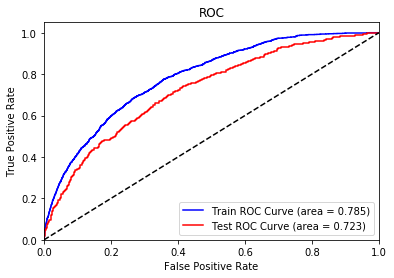

In [651]:
plot_roc_curve(y_train, xgbst_model.predict(dtrain), y_test, xgbst_model.predict(dtest))

### Catboost

In [69]:
categorical_features_mask = label_features_mask + dummy_features_mask

x_train, x_test, y_train, y_test = train_test_split(train_data, 
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state=1)

In [201]:
class_weights = class_weight.compute_class_weight('balanced',np.unique(y_train),y_train)
cbc_model = CatBoostClassifier(
    iterations = 1500, 
    learning_rate = 0.008,
    l2_leaf_reg = 20,
    loss_function = "Logloss",
#     subsample = 0.7,
#     one_hot_max_size = 30,
    rsm = 0.8,
#     bagging_temperature = 3,
#     bootstrap_type="Bernoulli",
    eval_metric='AUC',
    use_best_model = True,
    early_stopping_rounds=50,
    depth=3,
    class_weights = class_weights, 
    random_seed=0,
)

cbc_model.fit(
    x_train, y_train,
    cat_features=categorical_features_mask,
    eval_set=(x_val, y_val),
    verbose = True,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.6131815	best: 0.6131815 (0)	total: 144ms	remaining: 3m 35s
1:	test: 0.6430215	best: 0.6430215 (1)	total: 243ms	remaining: 3m 1s
2:	test: 0.6537686	best: 0.6537686 (2)	total: 344ms	remaining: 2m 51s
3:	test: 0.6602547	best: 0.6602547 (3)	total: 511ms	remaining: 3m 11s
4:	test: 0.6637287	best: 0.6637287 (4)	total: 849ms	remaining: 4m 13s
5:	test: 0.6636106	best: 0.6637287 (4)	total: 1.19s	remaining: 4m 56s
6:	test: 0.6646287	best: 0.6646287 (6)	total: 1.31s	remaining: 4m 39s
7:	test: 0.6656345	best: 0.6656345 (7)	total: 1.5s	remaining: 4m 38s
8:	test: 0.6654858	best: 0.6656345 (7)	total: 1.81s	remaining: 4m 59s
9:	test: 0.6684168	best: 0.6684168 (9)	total: 2.2s	remaining: 5m 27s
10:	test: 0.6685913	best: 0.6685913 (10)	total: 2.29s	remaining: 5m 10s
11:	test: 0.6699715	best: 0.6699715 (11)	total: 2.38s	remaining: 4m 55s
12:	test: 0.6693103	best: 0.6699715 (11)	total: 2.5s	remaining: 4m 46s
13:	test: 0.6691642	best: 0.6699715 (11)	total: 2.6s	remaining: 4m 36s
14:	test: 0.66964

116:	test: 0.6896264	best: 0.6896264 (116)	total: 12.9s	remaining: 2m 31s
117:	test: 0.6899541	best: 0.6899541 (117)	total: 13s	remaining: 2m 32s
118:	test: 0.6900713	best: 0.6900713 (118)	total: 13.1s	remaining: 2m 31s
119:	test: 0.6900307	best: 0.6900713 (118)	total: 13.2s	remaining: 2m 31s
120:	test: 0.6903777	best: 0.6903777 (120)	total: 13.3s	remaining: 2m 31s
121:	test: 0.6902142	best: 0.6903777 (120)	total: 13.4s	remaining: 2m 30s
122:	test: 0.6904131	best: 0.6904131 (122)	total: 13.4s	remaining: 2m 30s
123:	test: 0.6906674	best: 0.6906674 (123)	total: 13.6s	remaining: 2m 30s
124:	test: 0.6910890	best: 0.6910890 (124)	total: 13.7s	remaining: 2m 30s
125:	test: 0.6916137	best: 0.6916137 (125)	total: 13.8s	remaining: 2m 30s
126:	test: 0.6919851	best: 0.6919851 (126)	total: 14s	remaining: 2m 31s
127:	test: 0.6920965	best: 0.6920965 (127)	total: 14.1s	remaining: 2m 31s
128:	test: 0.6921905	best: 0.6921905 (128)	total: 14.2s	remaining: 2m 31s
129:	test: 0.6921596	best: 0.6921905 (128)

228:	test: 0.7047661	best: 0.7047661 (228)	total: 24s	remaining: 2m 13s
229:	test: 0.7047854	best: 0.7047854 (229)	total: 24.1s	remaining: 2m 13s
230:	test: 0.7049393	best: 0.7049393 (230)	total: 24.2s	remaining: 2m 12s
231:	test: 0.7050178	best: 0.7050178 (231)	total: 24.3s	remaining: 2m 12s
232:	test: 0.7049515	best: 0.7050178 (231)	total: 24.4s	remaining: 2m 12s
233:	test: 0.7052032	best: 0.7052032 (233)	total: 24.5s	remaining: 2m 12s
234:	test: 0.7053095	best: 0.7053095 (234)	total: 24.6s	remaining: 2m 12s
235:	test: 0.7052142	best: 0.7053095 (234)	total: 24.7s	remaining: 2m 12s
236:	test: 0.7053365	best: 0.7053365 (236)	total: 24.8s	remaining: 2m 11s
237:	test: 0.7054955	best: 0.7054955 (237)	total: 24.9s	remaining: 2m 12s
238:	test: 0.7055077	best: 0.7055077 (238)	total: 25s	remaining: 2m 11s
239:	test: 0.7055251	best: 0.7055251 (239)	total: 25.1s	remaining: 2m 11s
240:	test: 0.7056822	best: 0.7056822 (240)	total: 25.2s	remaining: 2m 11s
241:	test: 0.7058187	best: 0.7058187 (241)

342:	test: 0.7148447	best: 0.7148447 (342)	total: 35.1s	remaining: 1m 58s
343:	test: 0.7148691	best: 0.7148691 (343)	total: 35.2s	remaining: 1m 58s
344:	test: 0.7149445	best: 0.7149445 (344)	total: 35.3s	remaining: 1m 58s
345:	test: 0.7150854	best: 0.7150854 (345)	total: 35.4s	remaining: 1m 58s
346:	test: 0.7151041	best: 0.7151041 (346)	total: 35.5s	remaining: 1m 57s
347:	test: 0.7151910	best: 0.7151910 (347)	total: 35.5s	remaining: 1m 57s
348:	test: 0.7151981	best: 0.7151981 (348)	total: 35.6s	remaining: 1m 57s
349:	test: 0.7152779	best: 0.7152779 (349)	total: 35.7s	remaining: 1m 57s
350:	test: 0.7152161	best: 0.7152779 (349)	total: 35.8s	remaining: 1m 57s
351:	test: 0.7153326	best: 0.7153326 (351)	total: 36s	remaining: 1m 57s
352:	test: 0.7153919	best: 0.7153919 (352)	total: 36.1s	remaining: 1m 57s
353:	test: 0.7153339	best: 0.7153919 (352)	total: 36.1s	remaining: 1m 56s
354:	test: 0.7154028	best: 0.7154028 (354)	total: 36.2s	remaining: 1m 56s
355:	test: 0.7154936	best: 0.7154936 (35

454:	test: 0.7213787	best: 0.7213787 (454)	total: 46.9s	remaining: 1m 47s
455:	test: 0.7214862	best: 0.7214862 (455)	total: 47s	remaining: 1m 47s
456:	test: 0.7215641	best: 0.7215641 (456)	total: 47.1s	remaining: 1m 47s
457:	test: 0.7216826	best: 0.7216826 (457)	total: 47.3s	remaining: 1m 47s
458:	test: 0.7217688	best: 0.7217688 (458)	total: 47.4s	remaining: 1m 47s
459:	test: 0.7217695	best: 0.7217695 (459)	total: 47.5s	remaining: 1m 47s
460:	test: 0.7218480	best: 0.7218480 (460)	total: 47.6s	remaining: 1m 47s
461:	test: 0.7219291	best: 0.7219291 (461)	total: 47.7s	remaining: 1m 47s
462:	test: 0.7221435	best: 0.7221435 (462)	total: 48s	remaining: 1m 47s
463:	test: 0.7221235	best: 0.7221435 (462)	total: 48.1s	remaining: 1m 47s
464:	test: 0.7221841	best: 0.7221841 (464)	total: 48.2s	remaining: 1m 47s
465:	test: 0.7222130	best: 0.7222130 (465)	total: 48.4s	remaining: 1m 47s
466:	test: 0.7221351	best: 0.7222130 (465)	total: 48.5s	remaining: 1m 47s
467:	test: 0.7221738	best: 0.7222130 (465)

566:	test: 0.7277255	best: 0.7277255 (566)	total: 58.9s	remaining: 1m 36s
567:	test: 0.7277428	best: 0.7277428 (567)	total: 59s	remaining: 1m 36s
568:	test: 0.7277403	best: 0.7277428 (567)	total: 59.1s	remaining: 1m 36s
569:	test: 0.7277654	best: 0.7277654 (569)	total: 59.2s	remaining: 1m 36s
570:	test: 0.7277988	best: 0.7277988 (570)	total: 59.3s	remaining: 1m 36s
571:	test: 0.7277956	best: 0.7277988 (570)	total: 59.4s	remaining: 1m 36s
572:	test: 0.7278677	best: 0.7278677 (572)	total: 59.5s	remaining: 1m 36s
573:	test: 0.7279694	best: 0.7279694 (573)	total: 59.6s	remaining: 1m 36s
574:	test: 0.7280151	best: 0.7280151 (574)	total: 59.7s	remaining: 1m 36s
575:	test: 0.7280267	best: 0.7280267 (575)	total: 59.9s	remaining: 1m 36s
576:	test: 0.7282334	best: 0.7282334 (576)	total: 1m	remaining: 1m 36s
577:	test: 0.7282894	best: 0.7282894 (577)	total: 1m	remaining: 1m 35s
578:	test: 0.7283486	best: 0.7283486 (578)	total: 1m	remaining: 1m 35s
579:	test: 0.7283859	best: 0.7283859 (579)	total:

678:	test: 0.7313478	best: 0.7313749 (675)	total: 1m 11s	remaining: 1m 25s
679:	test: 0.7313317	best: 0.7313749 (675)	total: 1m 11s	remaining: 1m 25s
680:	test: 0.7313517	best: 0.7313749 (675)	total: 1m 11s	remaining: 1m 25s
681:	test: 0.7313993	best: 0.7313993 (681)	total: 1m 11s	remaining: 1m 25s
682:	test: 0.7313665	best: 0.7313993 (681)	total: 1m 11s	remaining: 1m 25s
683:	test: 0.7314830	best: 0.7314830 (683)	total: 1m 11s	remaining: 1m 25s
684:	test: 0.7314779	best: 0.7314830 (683)	total: 1m 11s	remaining: 1m 25s
685:	test: 0.7314631	best: 0.7314830 (683)	total: 1m 11s	remaining: 1m 25s
686:	test: 0.7315075	best: 0.7315075 (686)	total: 1m 11s	remaining: 1m 25s
687:	test: 0.7315841	best: 0.7315841 (687)	total: 1m 12s	remaining: 1m 25s
688:	test: 0.7317000	best: 0.7317000 (688)	total: 1m 12s	remaining: 1m 24s
689:	test: 0.7317792	best: 0.7317792 (689)	total: 1m 12s	remaining: 1m 24s
690:	test: 0.7317689	best: 0.7317792 (689)	total: 1m 12s	remaining: 1m 24s
691:	test: 0.7318371	best

788:	test: 0.7343522	best: 0.7343522 (788)	total: 1m 22s	remaining: 1m 14s
789:	test: 0.7343606	best: 0.7343606 (789)	total: 1m 22s	remaining: 1m 14s
790:	test: 0.7344018	best: 0.7344018 (790)	total: 1m 22s	remaining: 1m 14s
791:	test: 0.7344250	best: 0.7344250 (791)	total: 1m 23s	remaining: 1m 14s
792:	test: 0.7344340	best: 0.7344340 (792)	total: 1m 23s	remaining: 1m 14s
793:	test: 0.7344340	best: 0.7344340 (792)	total: 1m 23s	remaining: 1m 13s
794:	test: 0.7344533	best: 0.7344533 (794)	total: 1m 23s	remaining: 1m 13s
795:	test: 0.7344758	best: 0.7344758 (795)	total: 1m 23s	remaining: 1m 13s
796:	test: 0.7344758	best: 0.7344758 (795)	total: 1m 23s	remaining: 1m 13s
797:	test: 0.7344887	best: 0.7344887 (797)	total: 1m 23s	remaining: 1m 13s
798:	test: 0.7344829	best: 0.7344887 (797)	total: 1m 23s	remaining: 1m 13s
799:	test: 0.7344475	best: 0.7344887 (797)	total: 1m 23s	remaining: 1m 13s
800:	test: 0.7344237	best: 0.7344887 (797)	total: 1m 23s	remaining: 1m 13s
801:	test: 0.7344713	best

900:	test: 0.7371351	best: 0.7371680 (897)	total: 1m 34s	remaining: 1m 3s
901:	test: 0.7371351	best: 0.7371680 (897)	total: 1m 34s	remaining: 1m 2s
902:	test: 0.7371667	best: 0.7371680 (897)	total: 1m 35s	remaining: 1m 2s
903:	test: 0.7371660	best: 0.7371680 (897)	total: 1m 35s	remaining: 1m 2s
904:	test: 0.7371660	best: 0.7371680 (897)	total: 1m 35s	remaining: 1m 2s
905:	test: 0.7371306	best: 0.7371680 (897)	total: 1m 35s	remaining: 1m 2s
906:	test: 0.7371609	best: 0.7371680 (897)	total: 1m 35s	remaining: 1m 2s
907:	test: 0.7372298	best: 0.7372298 (907)	total: 1m 35s	remaining: 1m 2s
908:	test: 0.7371976	best: 0.7372298 (907)	total: 1m 35s	remaining: 1m 2s
909:	test: 0.7371828	best: 0.7372298 (907)	total: 1m 35s	remaining: 1m 2s
910:	test: 0.7372195	best: 0.7372298 (907)	total: 1m 35s	remaining: 1m 2s
911:	test: 0.7372690	best: 0.7372690 (911)	total: 1m 36s	remaining: 1m 1s
912:	test: 0.7372787	best: 0.7372787 (912)	total: 1m 36s	remaining: 1m 1s
913:	test: 0.7372748	best: 0.7372787 (

1013:	test: 0.7383448	best: 0.7383460 (1012)	total: 1m 47s	remaining: 51.5s
1014:	test: 0.7383551	best: 0.7383551 (1014)	total: 1m 47s	remaining: 51.4s
1015:	test: 0.7383319	best: 0.7383551 (1014)	total: 1m 47s	remaining: 51.2s
1016:	test: 0.7383905	best: 0.7383905 (1016)	total: 1m 47s	remaining: 51.1s
1017:	test: 0.7384072	best: 0.7384072 (1017)	total: 1m 47s	remaining: 51s
1018:	test: 0.7384600	best: 0.7384600 (1018)	total: 1m 47s	remaining: 50.9s
1019:	test: 0.7385128	best: 0.7385128 (1019)	total: 1m 47s	remaining: 50.8s
1020:	test: 0.7385437	best: 0.7385437 (1020)	total: 1m 48s	remaining: 50.7s
1021:	test: 0.7385488	best: 0.7385488 (1021)	total: 1m 48s	remaining: 50.6s
1022:	test: 0.7385314	best: 0.7385488 (1021)	total: 1m 48s	remaining: 50.5s
1023:	test: 0.7385256	best: 0.7385488 (1021)	total: 1m 48s	remaining: 50.4s
1024:	test: 0.7385604	best: 0.7385604 (1024)	total: 1m 48s	remaining: 50.3s
1025:	test: 0.7385218	best: 0.7385604 (1024)	total: 1m 48s	remaining: 50.2s
1026:	test: 0.

1124:	test: 0.7399882	best: 0.7400172 (1123)	total: 1m 59s	remaining: 39.9s
1125:	test: 0.7400043	best: 0.7400172 (1123)	total: 1m 59s	remaining: 39.8s
1126:	test: 0.7399026	best: 0.7400172 (1123)	total: 1m 59s	remaining: 39.7s
1127:	test: 0.7398704	best: 0.7400172 (1123)	total: 1m 59s	remaining: 39.5s
1128:	test: 0.7398814	best: 0.7400172 (1123)	total: 2m	remaining: 39.4s
1129:	test: 0.7398968	best: 0.7400172 (1123)	total: 2m	remaining: 39.3s
1130:	test: 0.7399239	best: 0.7400172 (1123)	total: 2m	remaining: 39.2s
1131:	test: 0.7400397	best: 0.7400397 (1131)	total: 2m	remaining: 39.1s
1132:	test: 0.7400153	best: 0.7400397 (1131)	total: 2m	remaining: 39s
1133:	test: 0.7400365	best: 0.7400397 (1131)	total: 2m	remaining: 38.9s
1134:	test: 0.7400925	best: 0.7400925 (1134)	total: 2m	remaining: 38.8s
1135:	test: 0.7401872	best: 0.7401872 (1135)	total: 2m	remaining: 38.7s
1136:	test: 0.7402103	best: 0.7402103 (1136)	total: 2m	remaining: 38.6s
1137:	test: 0.7402483	best: 0.7402483 (1137)	total

1234:	test: 0.7416395	best: 0.7416395 (1234)	total: 2m 11s	remaining: 28.2s
1235:	test: 0.7416453	best: 0.7416453 (1235)	total: 2m 11s	remaining: 28.1s
1236:	test: 0.7416710	best: 0.7416710 (1236)	total: 2m 11s	remaining: 28s
1237:	test: 0.7417264	best: 0.7417264 (1237)	total: 2m 11s	remaining: 27.9s
1238:	test: 0.7417154	best: 0.7417264 (1237)	total: 2m 12s	remaining: 27.8s
1239:	test: 0.7417277	best: 0.7417277 (1239)	total: 2m 12s	remaining: 27.7s
1240:	test: 0.7416948	best: 0.7417277 (1239)	total: 2m 12s	remaining: 27.6s
1241:	test: 0.7416813	best: 0.7417277 (1239)	total: 2m 12s	remaining: 27.5s
1242:	test: 0.7416948	best: 0.7417277 (1239)	total: 2m 12s	remaining: 27.4s
1243:	test: 0.7417367	best: 0.7417367 (1243)	total: 2m 12s	remaining: 27.3s
1244:	test: 0.7417373	best: 0.7417373 (1244)	total: 2m 12s	remaining: 27.2s
1245:	test: 0.7418319	best: 0.7418319 (1245)	total: 2m 12s	remaining: 27.1s
1246:	test: 0.7418809	best: 0.7418809 (1246)	total: 2m 12s	remaining: 27s
1247:	test: 0.74

1344:	test: 0.7432218	best: 0.7432295 (1340)	total: 2m 23s	remaining: 16.6s
1345:	test: 0.7432315	best: 0.7432315 (1345)	total: 2m 23s	remaining: 16.5s
1346:	test: 0.7432817	best: 0.7432817 (1346)	total: 2m 24s	remaining: 16.4s
1347:	test: 0.7433441	best: 0.7433441 (1347)	total: 2m 24s	remaining: 16.3s
1348:	test: 0.7433332	best: 0.7433441 (1347)	total: 2m 24s	remaining: 16.2s
1349:	test: 0.7433454	best: 0.7433454 (1349)	total: 2m 24s	remaining: 16.1s
1350:	test: 0.7433467	best: 0.7433467 (1350)	total: 2m 24s	remaining: 15.9s
1351:	test: 0.7433583	best: 0.7433583 (1351)	total: 2m 24s	remaining: 15.8s
1352:	test: 0.7434458	best: 0.7434458 (1352)	total: 2m 24s	remaining: 15.7s
1353:	test: 0.7434967	best: 0.7434967 (1353)	total: 2m 24s	remaining: 15.6s
1354:	test: 0.7435495	best: 0.7435495 (1354)	total: 2m 25s	remaining: 15.5s
1355:	test: 0.7435450	best: 0.7435495 (1354)	total: 2m 25s	remaining: 15.4s
1356:	test: 0.7435276	best: 0.7435495 (1354)	total: 2m 25s	remaining: 15.3s
1357:	test: 

1452:	test: 0.7442917	best: 0.7443876 (1444)	total: 2m 36s	remaining: 5.05s
1453:	test: 0.7442589	best: 0.7443876 (1444)	total: 2m 36s	remaining: 4.94s
1454:	test: 0.7442286	best: 0.7443876 (1444)	total: 2m 36s	remaining: 4.83s
1455:	test: 0.7442241	best: 0.7443876 (1444)	total: 2m 36s	remaining: 4.72s
1456:	test: 0.7442898	best: 0.7443876 (1444)	total: 2m 36s	remaining: 4.62s
1457:	test: 0.7442904	best: 0.7443876 (1444)	total: 2m 36s	remaining: 4.51s
1458:	test: 0.7443020	best: 0.7443876 (1444)	total: 2m 36s	remaining: 4.41s
1459:	test: 0.7443065	best: 0.7443876 (1444)	total: 2m 36s	remaining: 4.3s
1460:	test: 0.7443213	best: 0.7443876 (1444)	total: 2m 37s	remaining: 4.19s
1461:	test: 0.7443213	best: 0.7443876 (1444)	total: 2m 37s	remaining: 4.09s
1462:	test: 0.7443027	best: 0.7443876 (1444)	total: 2m 37s	remaining: 3.98s
1463:	test: 0.7443007	best: 0.7443876 (1444)	total: 2m 37s	remaining: 3.87s
1464:	test: 0.7443290	best: 0.7443876 (1444)	total: 2m 37s	remaining: 3.77s
1465:	test: 0

In [202]:
x_train_probs_cbc = cbc_model.predict_proba(x_train)
fpr, tpr, thresholds = metrics.roc_curve(y_train, x_train_probs_cbc[:,1])
metrics.auc(fpr, tpr)

0.7870156967009577

In [203]:
x_test_probs_cbc = cbc_model.predict_proba(x_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, x_test_probs_cbc[:,1])
metrics.auc(fpr, tpr)

0.7276845246914887

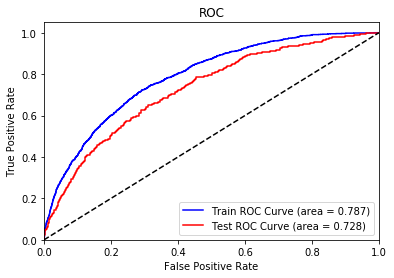

In [204]:
plot_roc_curve(y_train, cbc_model.predict_proba(x_train)[:,1], y_test, cbc_model.predict_proba(x_test)[:,1])

### Random forest

In [83]:
x_train, x_test, y_train, y_test = train_test_split(train_data, 
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state=1)

In [181]:
rf_clf = RandomForestClassifier(n_estimators = 300, 
                                random_state = 0, 
                                max_depth = 3, 
                                criterion = 'gini',
                                min_samples_split = 256,
                                min_samples_leaf = 100,
                                oob_score = True,
                                min_weight_fraction_leaf = 0.01,
                                max_leaf_nodes = 6,
                               )
rf_clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=6,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=256,
                       min_weight_fraction_leaf=0.01, n_estimators=300,
                       n_jobs=None, oob_score=True, random_state=0, verbose=0,
                       warm_start=False)

In [182]:
x_train_probs_rf = rf_clf.predict_proba(x_train)
fpr, tpr, thresholds = metrics.roc_curve(y_train, x_train_probs_rf[:,1])
metrics.auc(fpr, tpr)

0.7031189764979089

In [183]:
x_test_probs_rf = rf_clf.predict_proba(x_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, x_test_probs_rf[:,1])
metrics.auc(fpr, tpr)

0.6754684047616333

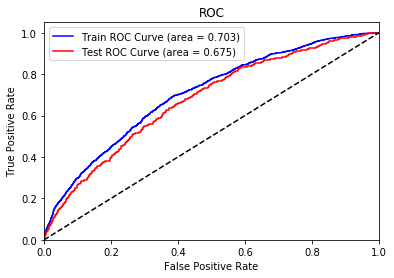

In [184]:
plot_roc_curve(y_train, rf_clf.predict_proba(x_train)[:,1], y_test, rf_clf.predict_proba(x_test)[:,1])